# Load necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data 

In [2]:
df = pd.read_csv('blood_pressure.csv')
display(df)

,Country/Region/World,ISO,Sex,Year,Mean systolic blood pressure (mmHg),Mean systolic blood pressure lower 95% uncertainty interval (mmHg),Mean systolic blood pressure upper 95% uncertainty interval (mmHg),Mean diastolic blood pressure (mmHg),Mean diastolic blood pressure lower 95% uncertainty interval (mmHg),Mean diastolic blood pressure upper 95% uncertainty interval (mmHg),Prevalence of raised blood pressure,Prevalence of raised blood pressure lower 95% uncertainty interval,Prevalence of raised blood pressure upper 95% uncertainty interval
0,World,NaN,Men,1975,126.639517,124.046827,129.283355,78.745508,77.037685,80.545847,0.294630,0.242415,0.350322
1,World,NaN,Men,1976,126.616241,124.234665,129.101757,78.738651,77.151228,80.413333,0.293486,0.243870,0.346572
2,World,NaN,Men,1977,126.592377,124.396769,128.880669,78.731943,77.258722,80.305553,0.292352,0.245538,0.342590
3,World,NaN,Men,1978,126.566776,124.521354,128.660965,78.724961,77.366000,80.170567,0.291208,0.246476,0.338457
4,World,NaN,Men,1979,126.539462,124.608071,128.465854,78.717849,77.438532,80.050932,0.290059,0.247500,0.334825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,World,NaN,Women,2011,122.303652,121.539246,123.036473,76.656703,76.150091,77.156772,0.207316,0.190279,0.224795
78,World,NaN,Women,2012,122.299701,121.453737,123.147998,76.670334,76.116483,77.240809,0.205590,0.187291,0.224347
79,World,NaN,Women,2013,122.292482,121.332288,123.272262,76.683210,76.054412,77.345923,0.203894,0.184245,0.224431
80,World,NaN,Women,2014,122.280096,121.177785,123.411599,76.693894,75.966137,77.451304,0.202216,0.181079,0.224867


In [3]:
df = df.loc[:,['Sex',
               'Mean systolic blood pressure (mmHg)', 
               'Mean diastolic blood pressure (mmHg)',
               'Prevalence of raised blood pressure']]

display(df)

,Sex,Mean systolic blood pressure (mmHg),Mean diastolic blood pressure (mmHg),Prevalence of raised blood pressure
0,Men,126.639517,78.745508,0.294630
1,Men,126.616241,78.738651,0.293486
2,Men,126.592377,78.731943,0.292352
3,Men,126.566776,78.724961,0.291208
4,Men,126.539462,78.717849,0.290059
...,...,...,...,...
77,Women,122.303652,76.656703,0.207316
78,Women,122.299701,76.670334,0.205590
79,Women,122.292482,76.683210,0.203894
80,Women,122.280096,76.693894,0.202216


# Visualice Data

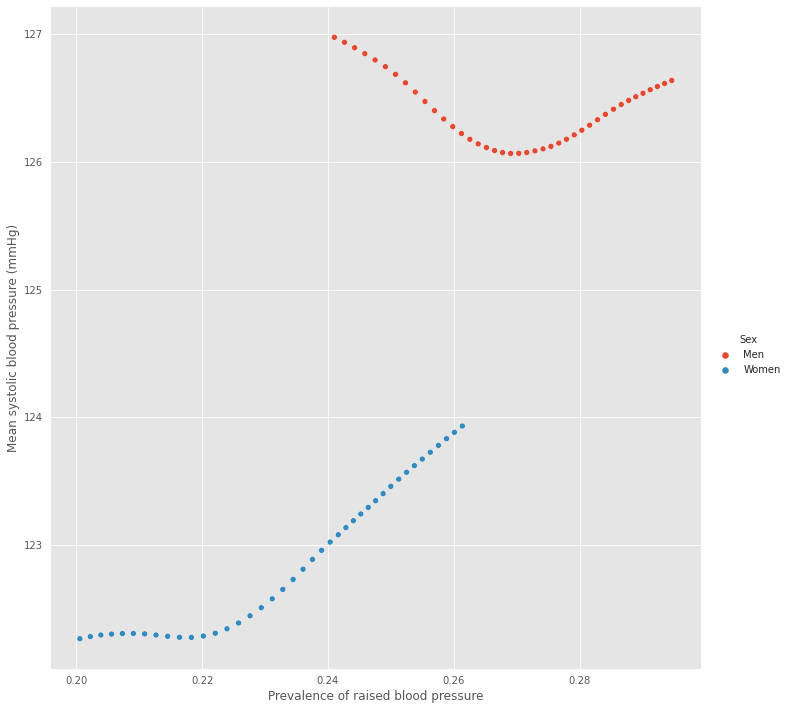

In [29]:
sns.pairplot(x_vars=['Prevalence of raised blood pressure'], y_vars=['Mean systolic blood pressure (mmHg)'], data=df, hue="Sex", height=10)

# Fit the Model

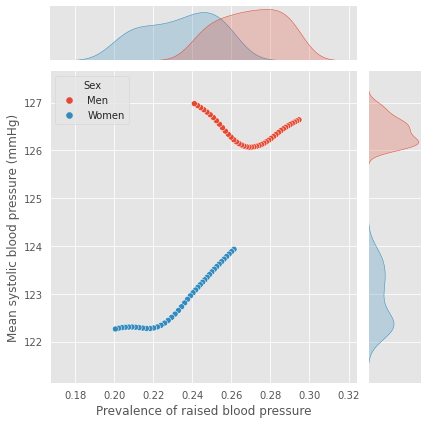

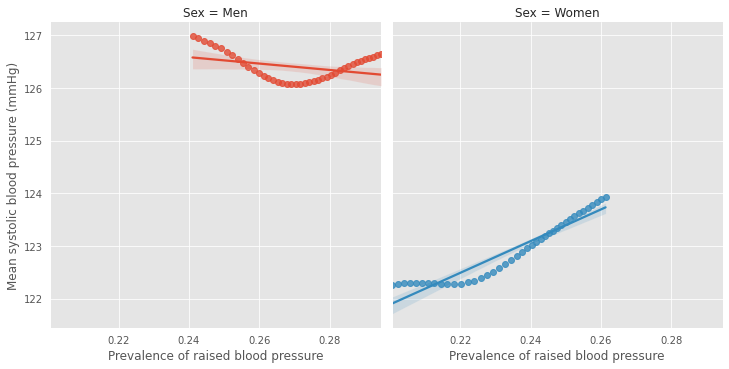

In [34]:
sns.lmplot(x = 'Prevalence of raised blood pressure', y = 'Mean systolic blood pressure (mmHg)', data = df, hue = 'Sex', col = 'Sex')

# Check ANOVA assumptions

## Normality of the Residues

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


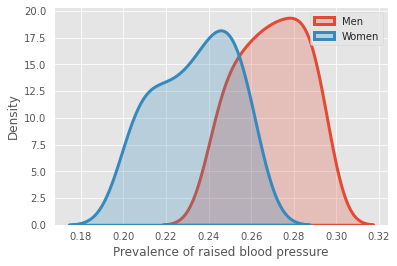

In [19]:
for group in df['Sex'].unique():
    
    subset = df[df['Sex'] == group]
    
    sns.distplot(subset['Prevalence of raised blood pressure'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3}, 
                      label = group)
plt.legend(df['Sex'].unique())
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


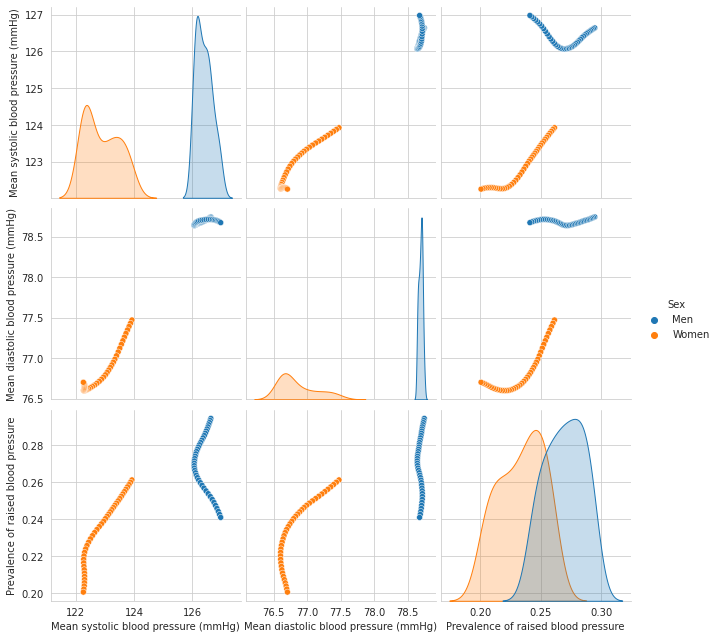

In [9]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Sex", size=3);
plt.show()

In [ ]:
sns.jointplot(x = 'Prevalence of raised blood pressure', y = 'Mean systolic blood pressure (mmHg)', data = df,  hue="Sex")

## Homoscedasticity between Groups

<AxesSubplot:xlabel='Sex', ylabel='Prevalence of raised blood pressure'>

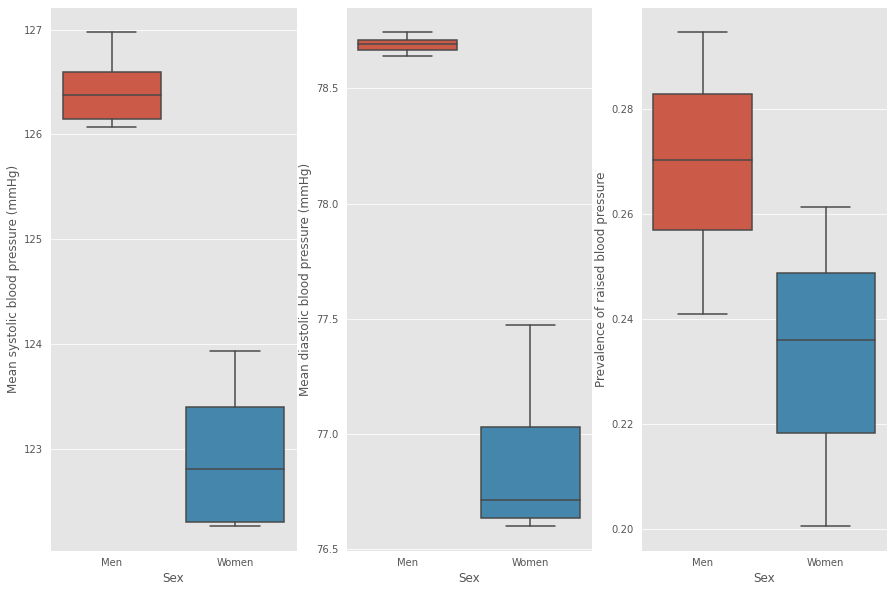

In [10]:
plt.figure(figsize = [15, 10])
plt.style.use('ggplot')
plt.subplot(1,3,1)
sns.boxplot(x = 'Sex', y = 'Mean systolic blood pressure (mmHg)', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'Sex', y = 'Mean diastolic blood pressure (mmHg)', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'Sex', y = 'Prevalence of raised blood pressure', data = df)


<AxesSubplot:xlabel='Sex', ylabel='Prevalence of raised blood pressure'>

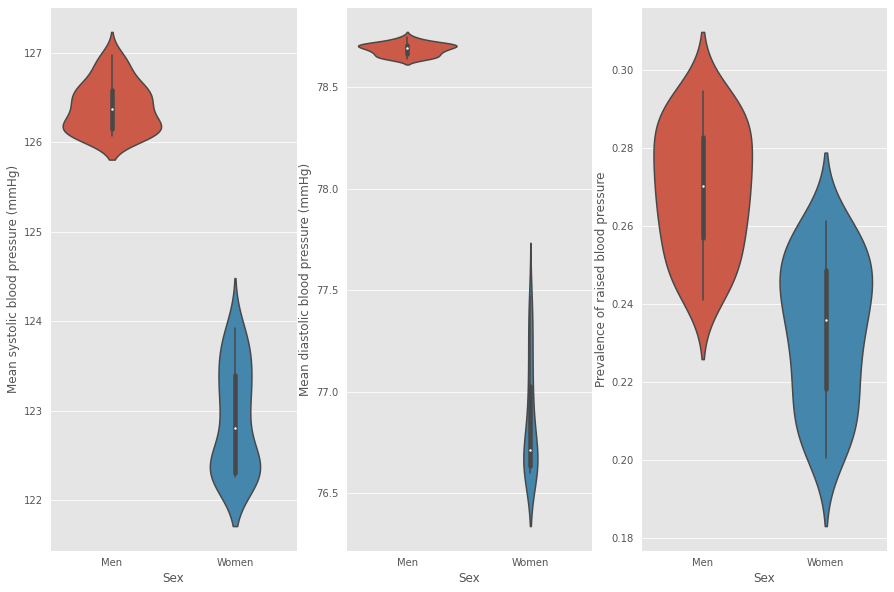

In [11]:
plt.figure(figsize = [15, 10])
plt.style.use('ggplot')
plt.subplot(1,3,1)
sns.violinplot(x = 'Sex', y = 'Mean systolic blood pressure (mmHg)', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'Sex', y = 'Mean diastolic blood pressure (mmHg)', data = df)
plt.subplot(1,3,3)
sns.violinplot(x = 'Sex', y = 'Prevalence of raised blood pressure', data = df)


# Exercise 1

# Exercise 2